# 신경망 모델
### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

### Case 1. Feature 변환 없이 수행

- 데이터셋/테스트셋 분리

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # fully connected network

In [6]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),    # 첫번째 은닉층, 노드 100개
    Dense(24, activation='relu'),                   # 두번째 은닉층, 노드 24개
    Dense(1, activation='sigmoid')                  # 출력층, 은닉층과는 달리 활성화함수가 sigmoid
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일

In [7]:
model.compile(
    optimizer='adam',               # 최적화함수, 기본값은 rmsprop
    loss='binary_crossentropy',     # 이진분류 문제에서는 binary_crossentropy
    metrics=['accuracy']            # 학습과정, 검증 데이터 평가
)

- 모델 학습

In [8]:
history = model.fit(
    X_train, y_train,               # 훈련 데이터셋
    validation_split=0.2,           # 검증 데이터는 20%
    epochs=100,                     # 반복횟수: 100
    batch_size=50                   # 한번에 메모리에 올려 놓고 계산하는 크기
)

Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 35.4892 - accuracy: 0.3956 - val_loss: 19.2601 - val_accuracy: 0.6484
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 18.7504 - accuracy: 0.6099 - val_loss: 5.7052 - val_accuracy: 0.3516
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 7.4466 - accuracy: 0.3819 - val_loss: 0.6278 - val_accuracy: 0.8132
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 2.0189 - accuracy: 0.7582 - val_loss: 1.0415 - val_accuracy: 0.6264
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 1.2906 - accuracy: 0.6648 - val_loss: 0.8672 - val_accuracy: 0.8791
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7857 - accuracy: 0.8214 - val_loss: 0.7398 - val_accuracy: 0.8022
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6158 - accuracy: 0.8462 - val_loss: 0.3684 - val_accuracy: 0.8901
Epoch 8/100
8/8 [===

- 모델 평가

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.9035


[0.28062838315963745, 0.9035087823867798]

- 훈련과정 시각화

In [10]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

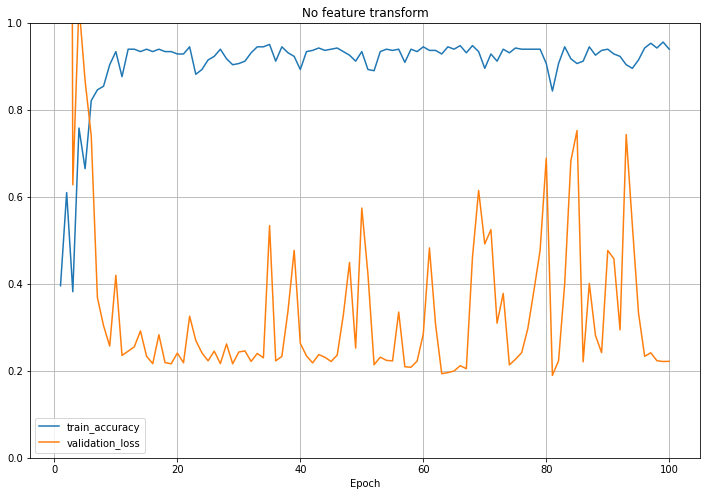

In [11]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train_accuracy')
plt.plot(xs, y_vloss, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### Case 2. 데이터 표준화

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)      # 표준 정규분포로 스케일 변환

In [13]:
df2 = pd.DataFrame(cancer_std)
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [15]:
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

In [17]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 0.6142 - accuracy: 0.6319 - val_loss: 0.4820 - val_accuracy: 0.8791
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.9313 - val_loss: 0.3441 - val_accuracy: 0.9121
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2691 - accuracy: 0.9478 - val_loss: 0.2555 - val_accuracy: 0.9231
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1960 - accuracy: 0.9588 - val_loss: 0.1998 - val_accuracy: 0.9341
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1520 - accuracy: 0.9588 - val_loss: 0.1652 - val_accuracy: 0.9341
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9615 - val_loss: 0.1441 - val_accuracy: 0.9451
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1071 - accuracy: 0.9725 - val_loss: 0.1328 - val_accuracy: 0.9451
Epoch 8/100
8/8 [=========

In [18]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9737


[0.0696815624833107, 0.9736841917037964]

In [19]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

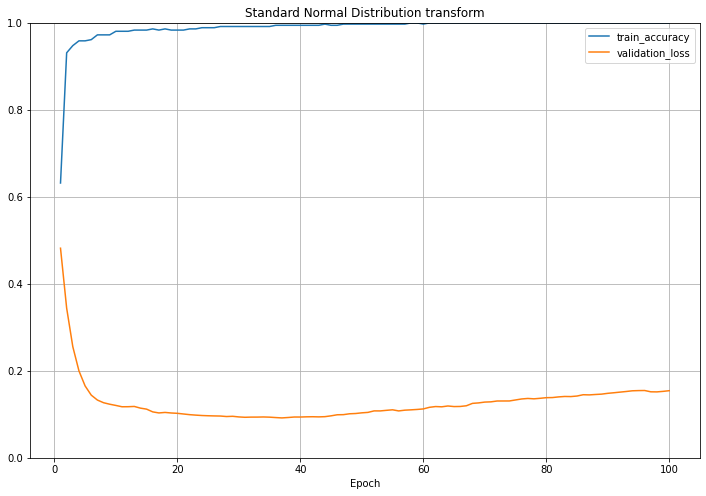

In [20]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train_accuracy')
plt.plot(xs2, y_vloss2, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('Standard Normal Distribution transform')
plt.show()